# Face Mask Detection Using Convolutional Neural Network

Importing Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

Importing Data

In [2]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


**Creating Labels for the two class of images**

With Mask --> 1

Without Mask --> 0

In [5]:
# Create the labels
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [6]:
print(with_mask_labels[:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

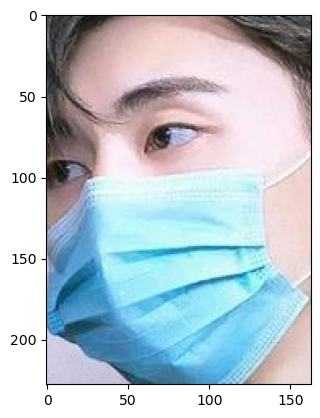

In [9]:
# Displaying with mask image
img = plt.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

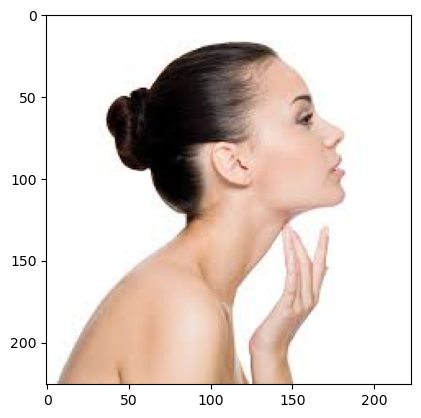

In [10]:
# Displaying image without mask
img = plt.imread('data/without_mask/without_mask_1086.jpg')
img = plt.imshow(img)
plt.show()

**Image Processing**

1 - Resize the image

2 - Converting images to numpy arrays

In [11]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


c:\Users\yar69\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

7553

In [14]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [18]:
print(type(X))

print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# Scaling the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
X_train_scaled[0]

array([[[0.72156863, 0.77647059, 0.78823529],
        [0.7254902 , 0.77254902, 0.78823529],
        [0.7254902 , 0.76862745, 0.78431373],
        ...,
        [0.4627451 , 0.45882353, 0.48235294],
        [0.4745098 , 0.4745098 , 0.49019608],
        [0.47058824, 0.47058824, 0.47843137]],

       [[0.7254902 , 0.78039216, 0.79215686],
        [0.7254902 , 0.77254902, 0.78823529],
        [0.7254902 , 0.76862745, 0.78431373],
        ...,
        [0.47058824, 0.46666667, 0.49019608],
        [0.47843137, 0.4745098 , 0.49019608],
        [0.4745098 , 0.4745098 , 0.48235294]],

       [[0.7254902 , 0.78039216, 0.79215686],
        [0.72941176, 0.77647059, 0.79215686],
        [0.72941176, 0.77254902, 0.78823529],
        ...,
        [0.4745098 , 0.47058824, 0.49803922],
        [0.47843137, 0.4745098 , 0.49019608],
        [0.4745098 , 0.4745098 , 0.48235294]],

       ...,

       [[0.84313725, 0.78039216, 0.66666667],
        [0.84705882, 0.78039216, 0.67058824],
        [0.85098039, 0

**Building a Convolutional Neural Network (CNN)**

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,  128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 605s 3s/step - loss: 0.4825 - acc: 0.7758 - val_loss: 0.3204 - val_acc: 0.8793
Epoch 2/10
170/170 [==============================] - 416s 2s/step - loss: 0.2876 - acc: 0.8884 - val_loss: 0.2680 - val_acc: 0.8942
Epoch 3/10
170/170 [==============================] - 481s 3s/step - loss: 0.2433 - acc: 0.9126 - val_loss: 0.2728 - val_acc: 0.8926
Epoch 4/10
170/170 [==============================] - 601s 4s/step - loss: 0.2026 - acc: 0.9231 - val_loss: 0.2037 - val_acc: 0.9190
Epoch 5/10
170/170 [==============================] - 412s 2s/step - loss: 0.1652 - acc: 0.9376 - val_loss: 0.2084 - val_acc: 0.9124
Epoch 6/10
170/170 [==============================] - 404s 2s/step - loss: 0.1328 - acc: 0.9507 - val_loss: 0.2342 - val_acc: 0.9256
Epoch 7/10
170/170 [==============================] - 408s 2s/step - loss: 0.1231 - acc: 0.9559 - val_loss: 0.1896 - val_acc: 0.9306
Epoch 8/10
170/170 [==============================] - 417s 2s/step - 

**Model Evaluation**

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 78s 923ms/step - loss: 0.1991 - acc: 0.9279
Test Accuracy = 0.9278623461723328


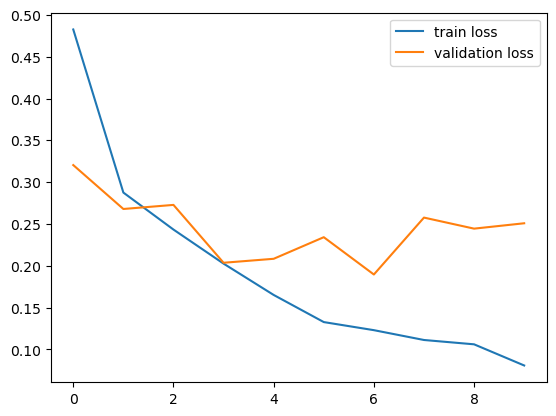

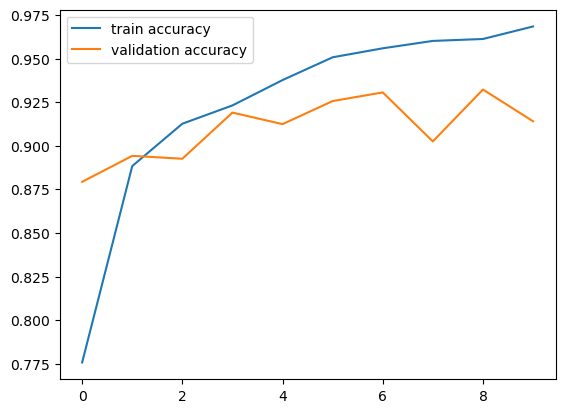

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

1/1 [==============================] - 28s 28s/step
[[0.37349892 0.4237313 ]]
1
The person in the image is wearing a mask


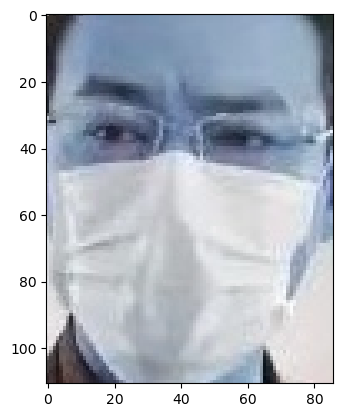

In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

1/1 [==============================] - 1s 1s/step
[[0.43601173 0.33735844]]
0
The person in the image is not wearing a mask


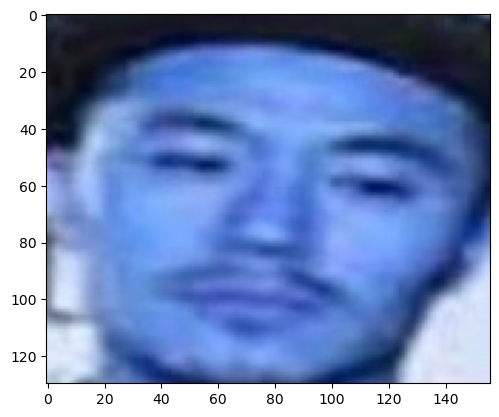

In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')